# Урок 8. Деревья решений.

В уроках мы разбирали на небольшом наборе данных деревья решений без настройки гиперпараметров. Здесь предлагаем вам рассмотреть работу классификатора на более сложном датасете, применив настройку гиперпараметров.

### 1.
На датасете из предыдущего урока - load_wine() - обучите дерево решений (DecisionTreeClassifier).

*Примечание: при установке гиперпараметров модели и разбиении на тренировочный и тестовый датасеты используйте random_state=17 для воспроизводимости результатов.*

In [1]:
import numpy as np

from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
### YOUR CODE HERE ###
wine_dataset = load_wine()

In [3]:
x_train, x_test, y_train, y_test = train_test_split(wine_dataset.data, wine_dataset['target'], random_state=17) 

In [4]:
dtc = DecisionTreeClassifier(random_state=17)
dtc_model = dtc.fit(x_train, y_train)

### 2.
Отобразите дерево с помощью библиотеки graphviz.

*Примечание: если, изучая урок, вы не установили библиотеку graphviz, то необходимо сделать это сейчас.*

In [5]:
# pip install graphviz

In [6]:
from sklearn import tree
import graphviz

In [7]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Python/Anaconda/Library/bin/graphviz'

In [8]:
### YOUR CODE HERE ###

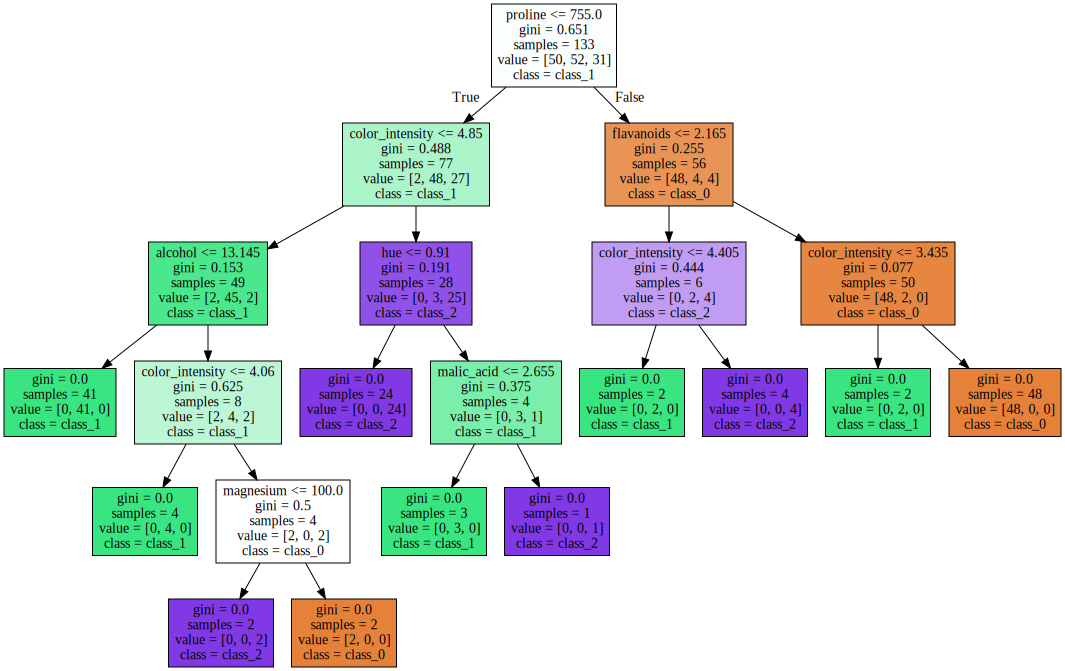

In [9]:
dot_data = tree.export_graphviz(dtc_model, out_file=None,
                                feature_names=wine_dataset.feature_names,  
                                class_names=wine_dataset.target_names,  
                                filled=True)  
graphviz.Source(dot_data)

### 3.
Используя полученную модель, сделайте прогноз для тестовой выборки данных и, пользуясь встроенной функцией score(), определите точность модели.

In [10]:
### YOUR CODE HERE ###

In [11]:
dtc_predictions = dtc.predict(x_test)
accuracy = dtc.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9111111111111111


In [12]:
dtc.score(x_train, y_train)

1.0

Теперь попробуем сделать начальную настройку гиперпараметров и посмотреть, что из этого выйдет. 

### 4.

Постройте модель, указав гиперпараметр max_features равным 2 (так же указав random_state=17) и, сделав прогноз на тестовых данных, определите, стала ли модель работать точнее.

*Примечание: гиперпараметр max_features показывает модели, сколько различных признаков необходимо использовать каждый раз при принятии решения о разделении. То есть если, допустим, у вас имеются 50 признаков, а max_features=10, то в каждом узле случайным образом выбираются 10 признаков, которые будут использоваться для поиска лучшего разделения.*

In [13]:
### YOUR CODE HERE ###

In [14]:
dtc = DecisionTreeClassifier(random_state = 17, max_features = 2, max_depth = 5)
dtc_model = dtc.fit(x_train, y_train)
dtc_predictions = dtc.predict(x_test)
accuracy = dtc.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9555555555555556


In [15]:
max_depth_array = np.arange(1, 10)
max_depth_array

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
for max_depth_ in max_depth_array:
    dtc = DecisionTreeClassifier(random_state = 17, max_features = 2, max_depth = max_depth_)
    dtc_model = dtc.fit(x_train, y_train)
    dtc_predictions = dtc.predict(x_test)
    accuracy = dtc.score(x_test, y_test)
    print('max_depth = %f, Accuracy = %f' % (max_depth_, accuracy))

max_depth = 1.000000, Accuracy = 0.533333
max_depth = 2.000000, Accuracy = 0.866667
max_depth = 3.000000, Accuracy = 0.822222
max_depth = 4.000000, Accuracy = 0.933333
max_depth = 5.000000, Accuracy = 0.955556
max_depth = 6.000000, Accuracy = 0.955556
max_depth = 7.000000, Accuracy = 0.955556
max_depth = 8.000000, Accuracy = 0.955556
max_depth = 9.000000, Accuracy = 0.955556


### 5.
Теперь постройте граф дерева решений, используя graphviz.

In [17]:
### YOUR CODE HERE ###

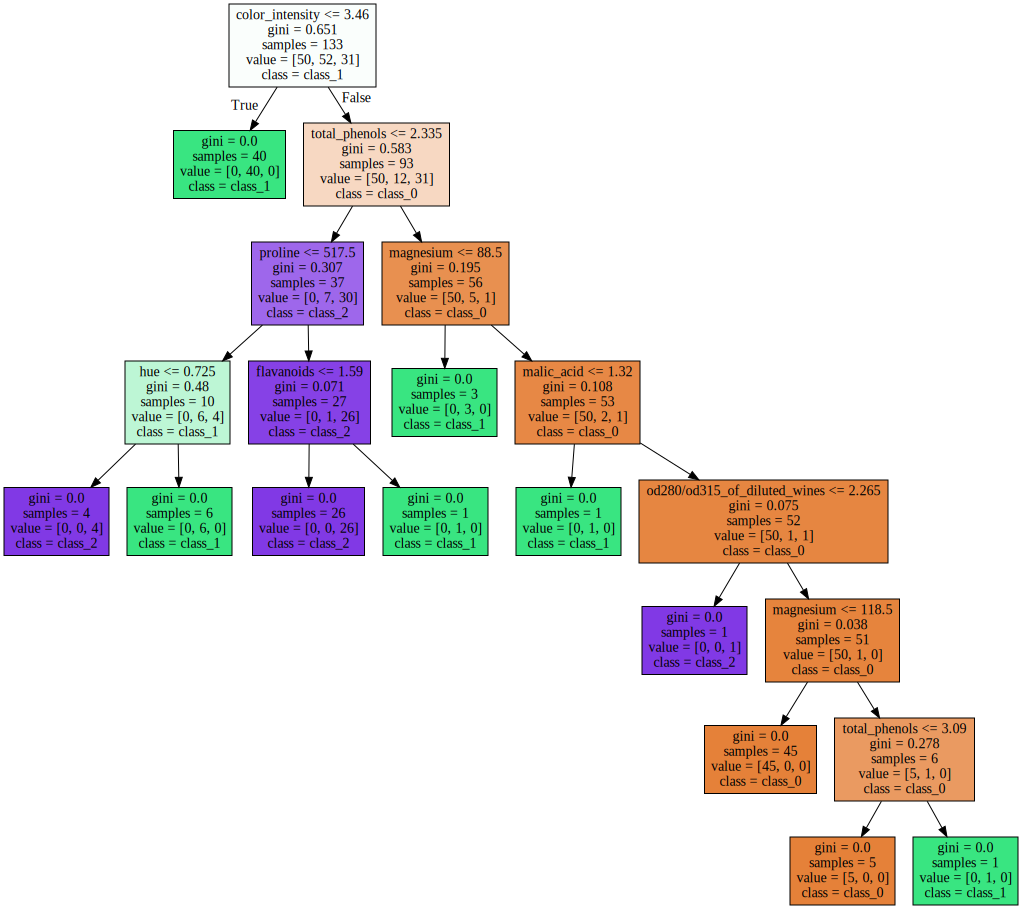

In [18]:
dot_data = tree.export_graphviz(dtc_model, out_file=None,
                                feature_names=wine_dataset.feature_names,  
                                class_names=wine_dataset.target_names,  
                                filled=True)  
graphviz.Source(dot_data)

Модель работает точнее, чем без настройки гиперпараметров, но по графу можно увидеть, что глубина дерева увеличилась, при этом в нескольких листах присутствует только по одному объекту, из-за чего на тестовом наборе данных дерево могло несколько потерять обобщающую способность.

Так как главная задача модели - способность обобщаться на новые данные, то для подбора оптимальных гиперпараметров надо пожертвовать небольшой порцией данных, чтобы на ней во время обучения проверять качество модели.

Часто для этого используют кросс-валидацию: модель обучается K раз на (K-1) подвыборках исходной выборки, а на одной подвыборке проверяется (каждый раз на разной). Получаются K оценок качества модели, которые обычно усредняются, давая среднюю оценку.

Кросс-валидация применяется для подбора гиперпараметров модели в методе GridSearchCV(): для каждой уникальной совокупности значений параметров проводится кросс-валидация и выбирается лучшее сочетание параметров.

### 6.
Используя обученное в предыдущем задании дерево решений, настройте параметры max_depth и max_features на 5-кратной валидации с помощью GridSearchCV. Для этого в функцию GridSearchCV передайте параметры (tree, tree_params, cv=5).

*Примечание: tree здесь - не обученная модель, а объект, который инкапсулирует алгоритм. Например, в уроке мы его обозначали как dtc.*

In [19]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [20]:
tree_params = {'max_depth': range(1, 6), 
               'max_features': range(1, 10)}

#### YOUR CODE HERE ###

In [21]:
tree = DecisionTreeClassifier()
tree_grid = GridSearchCV(tree, tree_params, cv=5) # кросс - валидация
tree_grid

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 6),
                         'm

### 7.
С помощью метода tree_grid.fit() постройте модель на тренировочных данных и выведите лучшее сочетание параметров с помощью метода tree_grid.best_params_.

In [22]:
### YOUR CODE HERE ###

In [23]:
tree_grid.fit(x_train, y_train)
tree_grid.best_params_

{'max_depth': 4, 'max_features': 5}

### 8.
С помощью полученной модели сделайте прогноз - predict - для тестовой выборки и выведите долю верных ответов, проверив точность модели, используя функцию accuracy_score.

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
predicted = tree_grid.predict(x_test)
accuracy_score(predicted, y_test)

0.9777777777777777

In [26]:
sum (y_test == predicted) / len(y_test) # доля верных ответов

0.9777777777777777